In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
print(f"Rows and columns -> Rows:{df.shape[0]} Columns: {df.shape[1]} \n")

df.info()

Rows and columns -> Rows:891 Columns: 12 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
print("Describe: \n",df.describe().T)

#converting to categorical
convert_to_category = ['Survived','Pclass','Sex','Cabin','Embarked']
for column in convert_to_category:
    df[column] = df[column].astype('category')

#check overview of Data again
print("Info: \n", df.info())

#drop columns that are not needed
columns_to_drop = ['PassengerId','Name']
for column in columns_to_drop:
    df = df.drop(columns=[column])

df.describe().T

#show columns
print("Columns; \n", df.columns)

#unique values
print("Unique Values: \n",df.nunique())

#show duplicates
print("Duplicated: \n",df.duplicated().sum())

Describe: 
              count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------    

<Axes: >

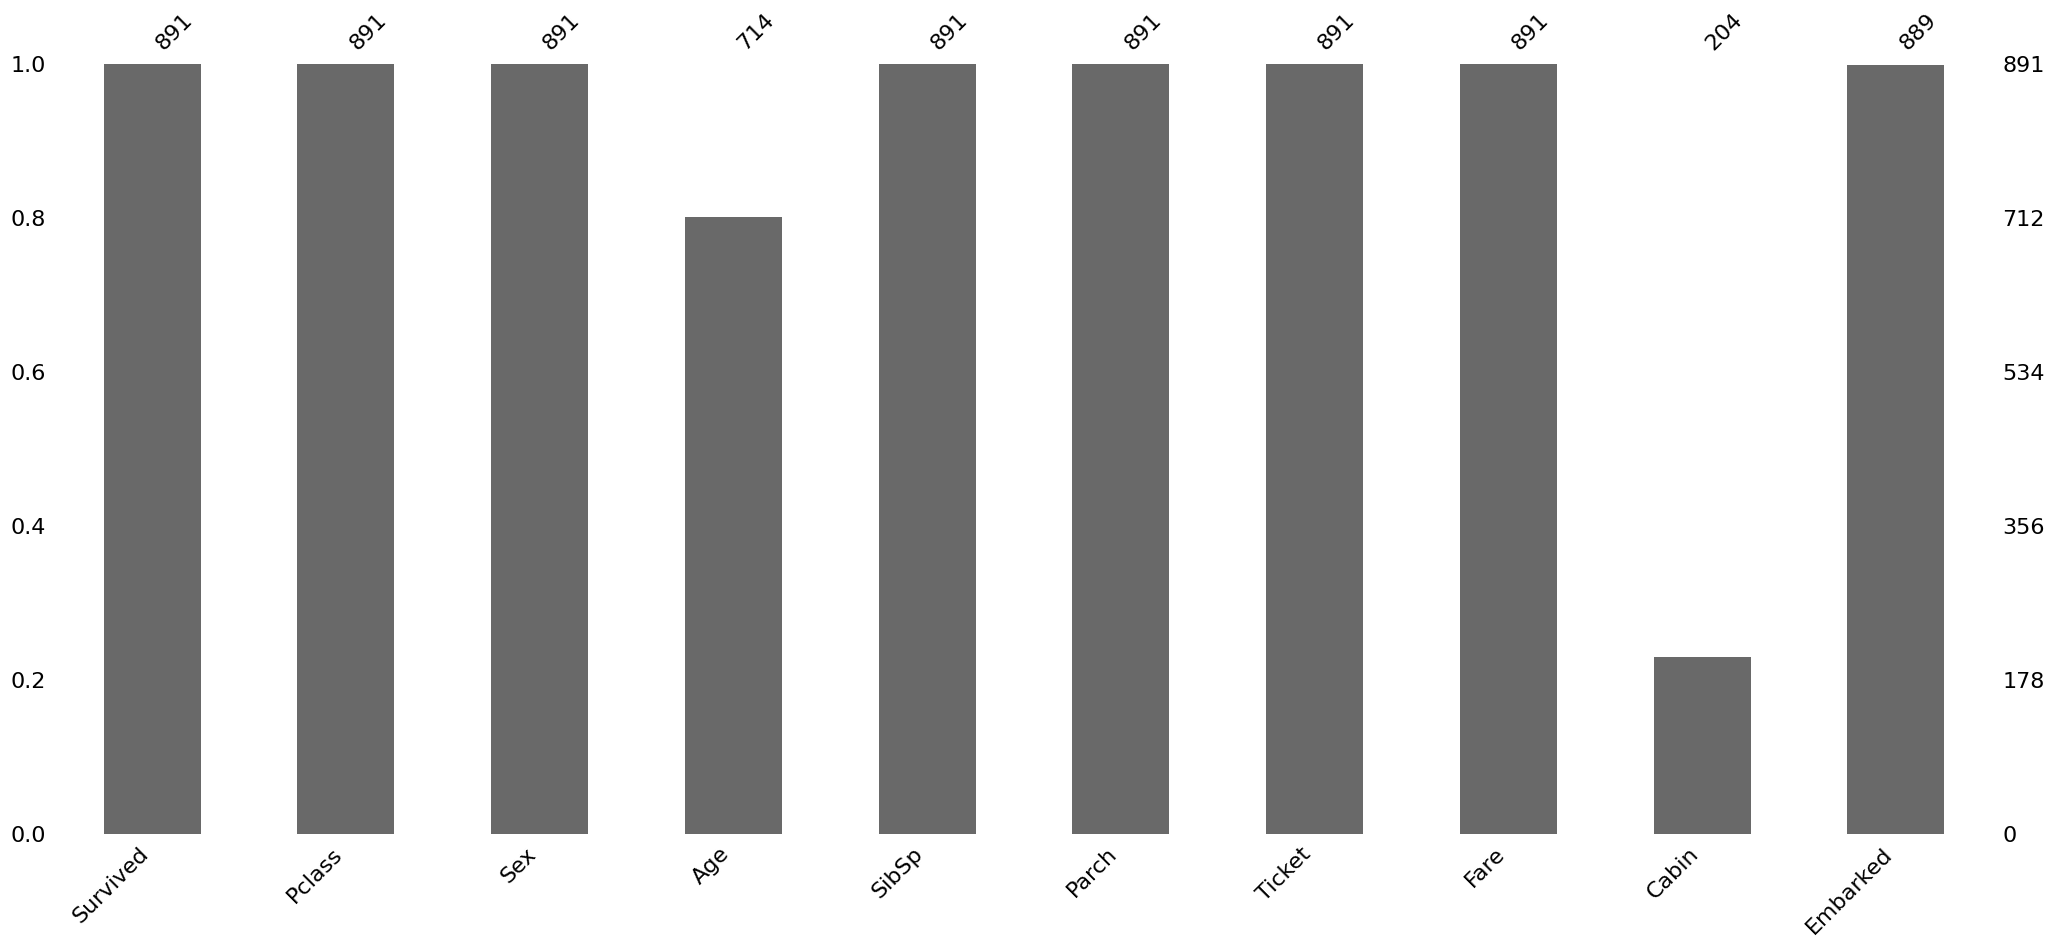

In [7]:
df.isna().mean()*100
msno.bar(df)

In [8]:
missing_values = df.isna().sum().sort_values(ascending=False)
missing_percentage = missing_values/ len(df) * 100

dict_missing = {"Missing Values":missing_values,"Missing percentage":missing_percentage}
df_dict = pd.DataFrame(dict_missing)
print(df_dict)

          Missing Values  Missing percentage
Cabin                687           77.104377
Age                  177           19.865320
Embarked               2            0.224467
Survived               0            0.000000
Pclass                 0            0.000000
Sex                    0            0.000000
Parch                  0            0.000000
SibSp                  0            0.000000
Fare                   0            0.000000
Ticket                 0            0.000000


In [9]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

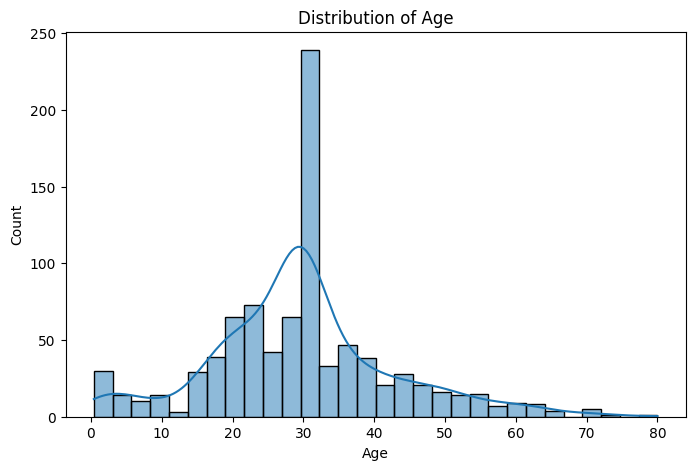

Skewness: 0.4344880940129925
Right Skewed, which implies that most of the passengers were young


In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
skewness = df['Age'].skew()
print(f"Skewness: {skewness}")
if skewness > 0:
    print("Right Skewed, which implies that most of the passengers were young")
elif skewness < 0:
    print("Left Skewed, which implies that most of the passengers were older")
else:
    print("Symmetrical")

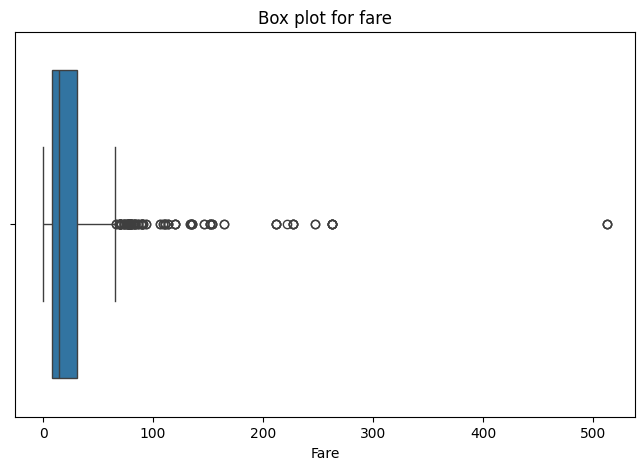

In [11]:
plt.figure(figsize = (8,5))
sns.boxplot(x=df['Fare'])
plt.title("Box plot for fare")
plt.show()

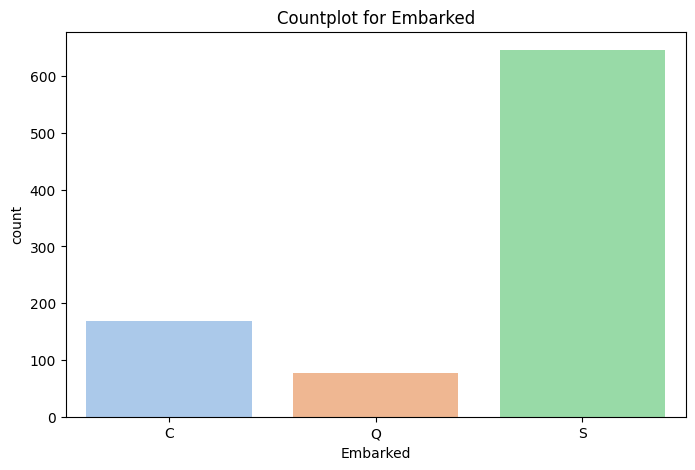

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x='Embarked', data=df, palette='pastel')
plt.title("Countplot for Embarked")
plt.show()

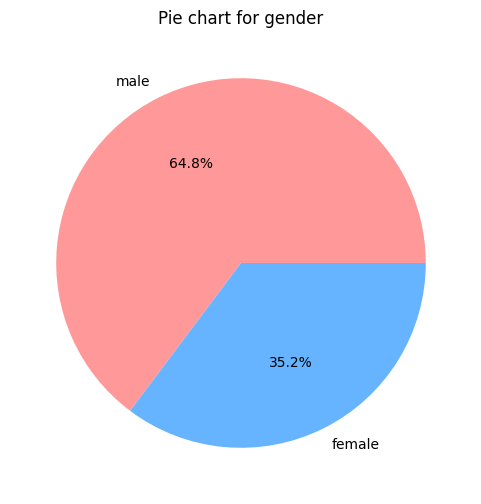

In [13]:
df['Sex'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), colors=['#ff9999', '#66b3ff'])
plt.title("Pie chart for gender")
plt.ylabel("")
plt.show()

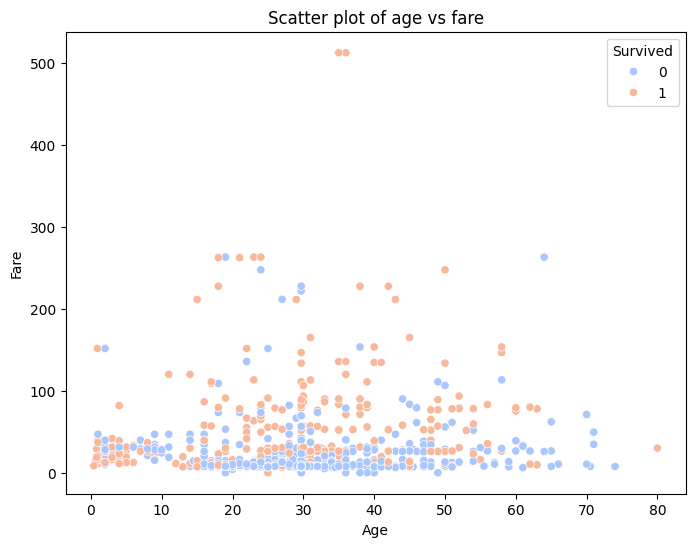

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age',y='Fare', data=df,hue='Survived',palette='coolwarm')
plt.title("Scatter plot of age vs fare")
plt.show()

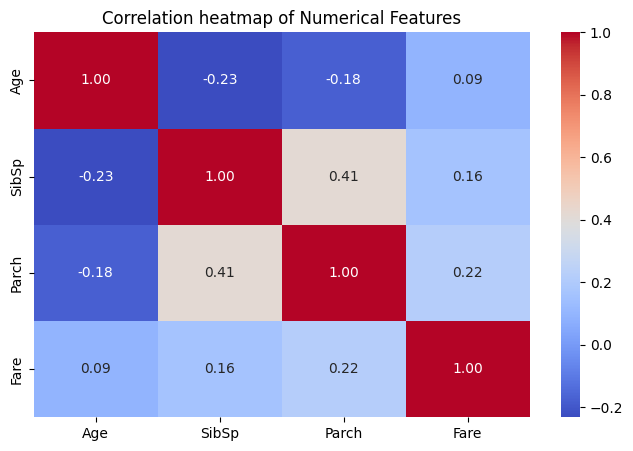

In [15]:
plt.figure(figsize=(8,5))

numerical_columns = df.select_dtypes(include=['int64','float64']).columns

sns.heatmap(df[numerical_columns].corr(),annot=True,  cmap='coolwarm', fmt='.2f')
plt.title("Correlation heatmap of Numerical Features")
plt.show()

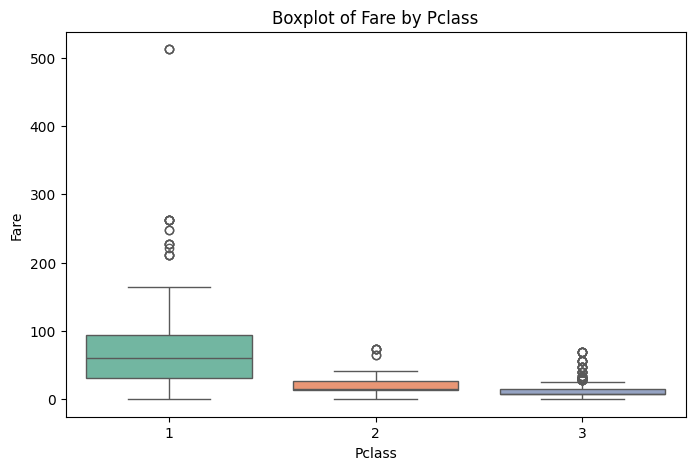

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Pclass',y='Fare', data=df, palette='Set2')
plt.title("Boxplot of Fare by Pclass")
plt.show()

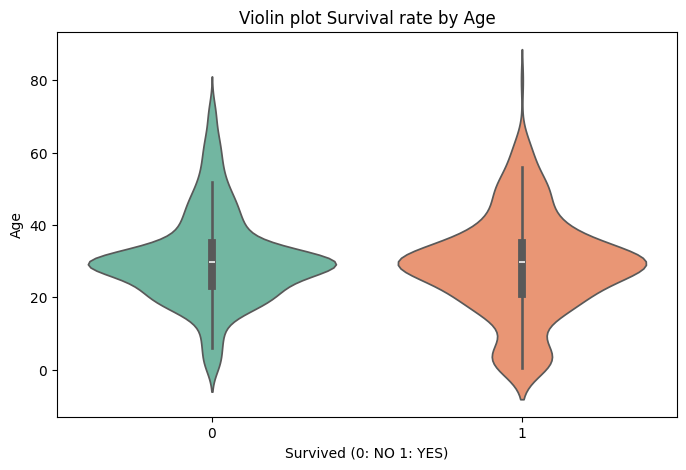

In [17]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Survived',y='Age', data=df, palette='Set2')
plt.title("Violin plot Survival rate by Age")
plt.xlabel("Survived (0: NO 1: YES)")
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Embarked', data=df, hue='Survived', palette='pastel')

<Axes: xlabel='Embarked', ylabel='count'>

<Figure size 1000x1000 with 0 Axes>

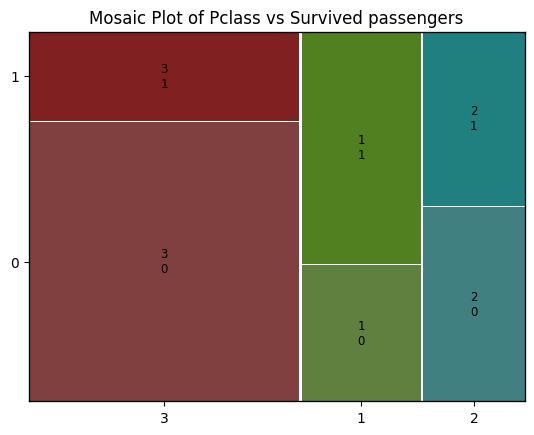

In [20]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

plt.figure(figsize=(10,10))
mosaic(df, ['Pclass', 'Survived'], title="Mosaic Plot of Pclass vs Survived passengers")
plt.show()

<Figure size 1000x1000 with 0 Axes>

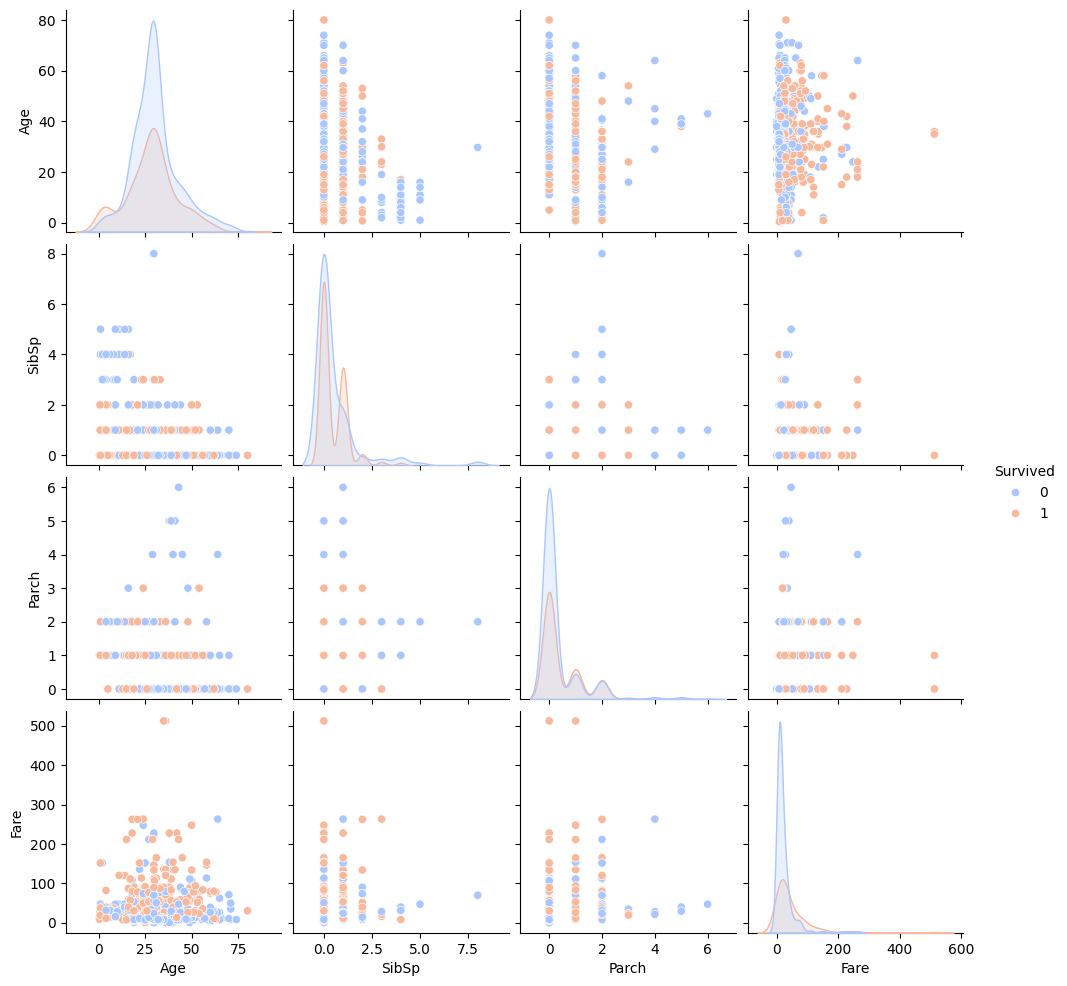

In [21]:
plt.figure(figsize=(10,10))
sns.pairplot(df, hue='Survived', diag_kind = 'kde' , palette='coolwarm' )
plt.show()

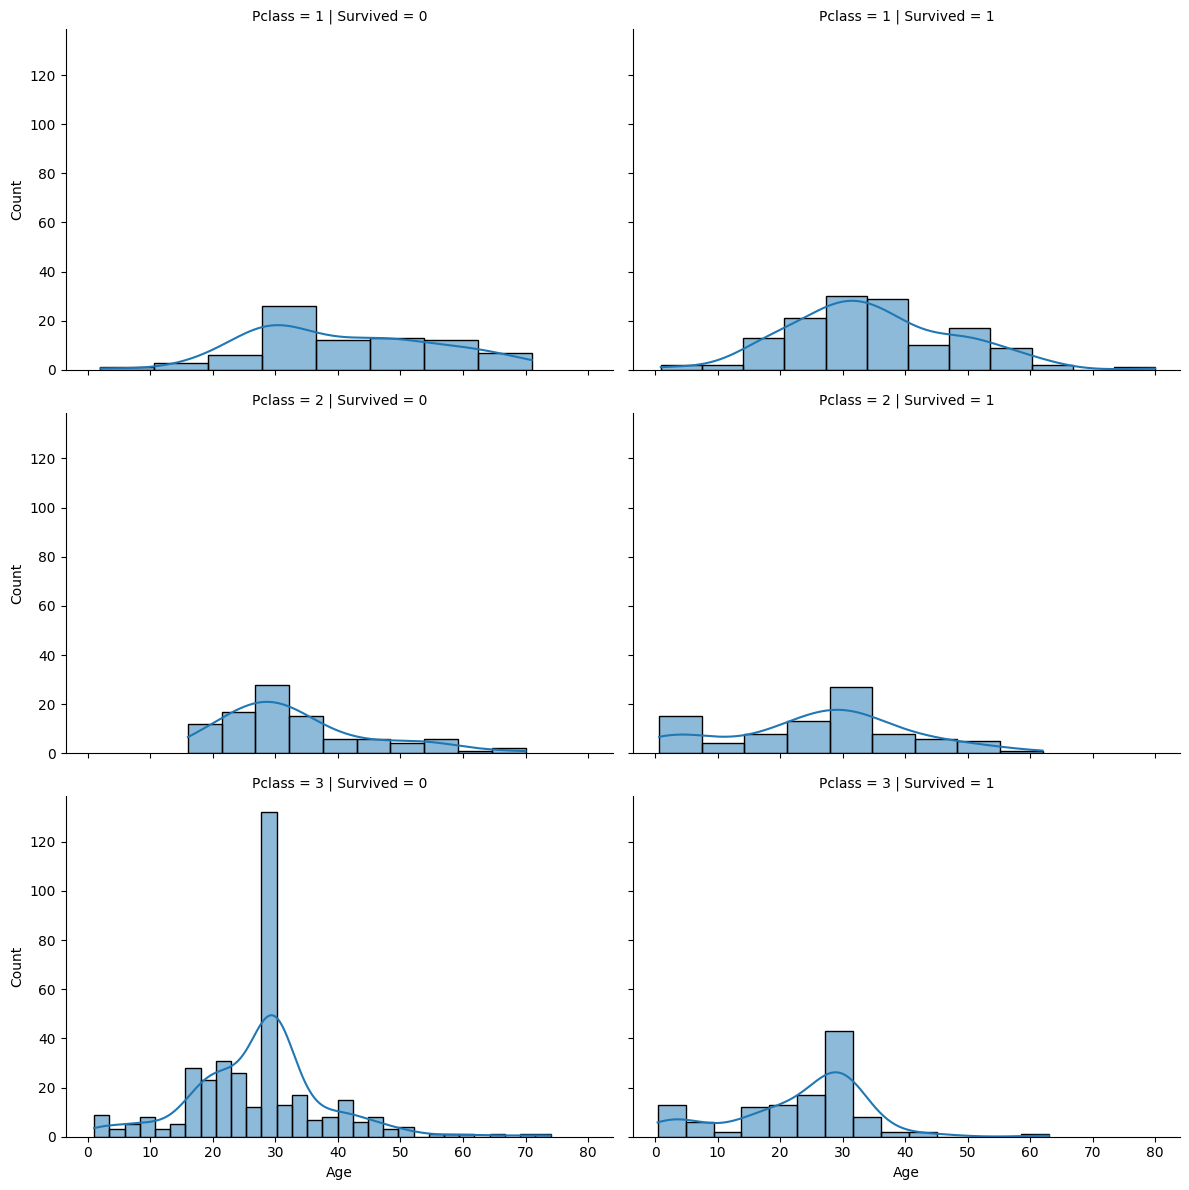

In [22]:
g = sns.FacetGrid(df, row='Pclass',col='Survived', height=4, aspect=1.5 )
g.map(sns.histplot,'Age', kde=True)
plt.show()

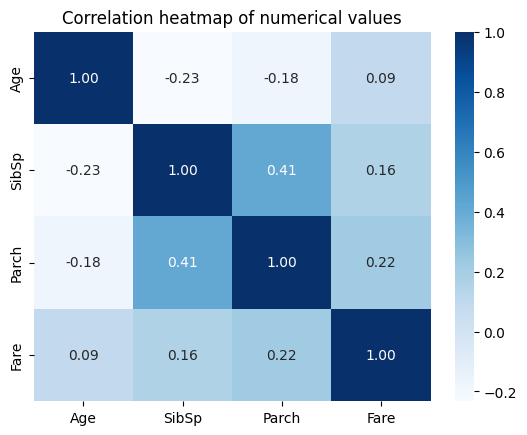

In [23]:
numerical_values = df.select_dtypes(include=['int64','float64']).columns

sns.heatmap(df[numerical_values].corr(), annot=True, cmap='Blues', fmt='.2f')

plt.title("Correlation heatmap of numerical values")
plt.show()

In [24]:
import plotly.express as px

fig = px.scatter_3d(df,x='Fare',y='Age',z='Survived', size='Fare', opacity=0.7)
fig.update_traces(marker=dict(line=dict(width=0)))
fig.update_layout(title='3D Scatter Plot: Age vs Fare vs Survived')
fig.show()

<Figure size 800x500 with 0 Axes>

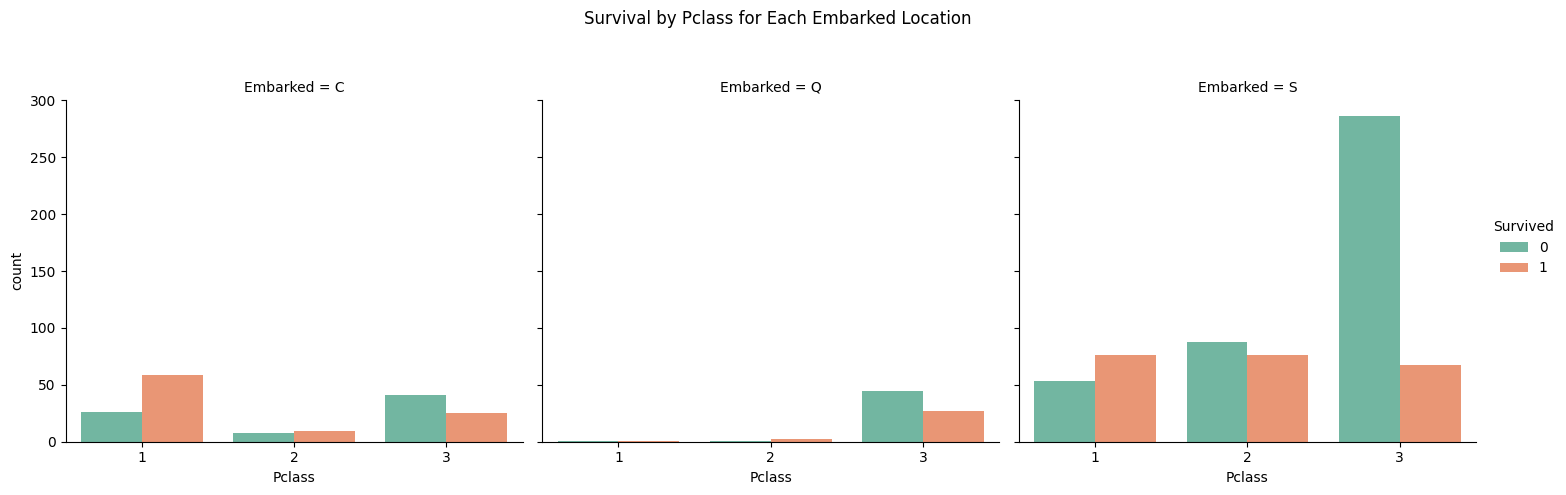

In [25]:
plt.figure(figsize=(8,5))
sns.catplot(x='Pclass', hue='Survived', col='Embarked', data=df, kind='count', palette='Set2')
plt.subplots_adjust(top=0.8)
plt.suptitle("Survival by Pclass for Each Embarked Location")
plt.show()

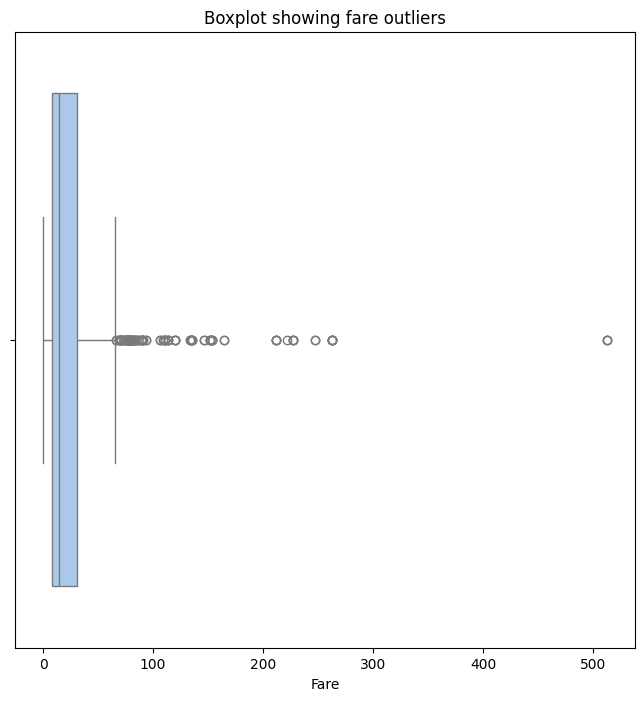

In [26]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df['Fare'], data=df, palette='pastel')
plt.title("Boxplot showing fare outliers")
plt.show()

In [27]:
def detect_outliers(data,threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = [(x - mean) / std for x in data]

    outliers = [x for x, z in zip(data,z_scores) if abs(z) > threshold]
    clean_data = [x for x, z in zip(data,z_scores) if abs(z) <= threshold ]

    return outliers,clean_data

outliers,clean_data = detect_outliers(df['Age'])
print(f"Number of outliers in Age: {len(outliers)}")
print(f"Clean data: {len(clean_data)}")

Number of outliers in Age: 7
Clean data: 884


In [28]:
def detect_outliers_IQR(data,multiplier=1.5):
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    iqr = q3 - q1

    lower_bound = q1 - (multiplier * iqr)
    upper_bound = q3 + (multiplier * iqr)

    outliers = []
    clean_data = []

    for x in data:
        if x < lower_bound or x > upper_bound:
            outliers.append(x)
        else:
            clean_data.append(x)

    return outliers,clean_data

outliers,clean_data = detect_outliers_IQR(df['Fare'])
print(f"Outliers: {len(outliers)}")
print(f"Clean Data: {len(clean_data)}")


Outliers: 116
Clean Data: 775


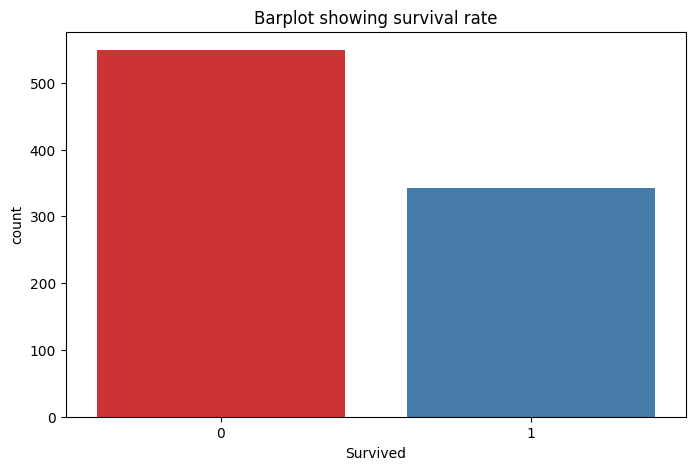

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x='Survived',data=df, palette='Set1')
plt.title("Barplot showing survival rate")
plt.show()

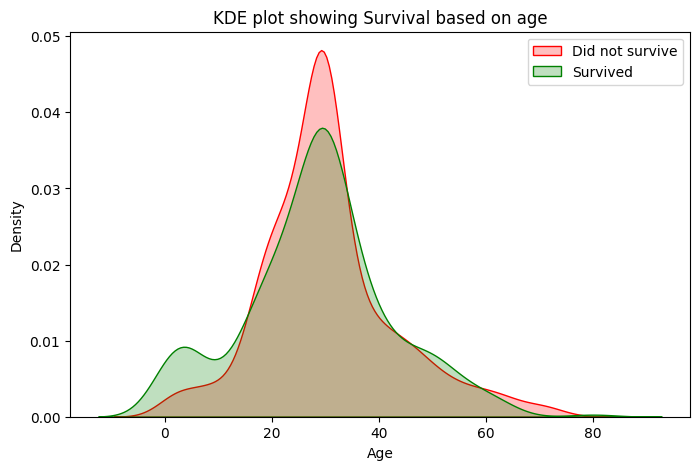

In [30]:
plt.figure(figsize=(8,5))
sns.kdeplot(df[df['Survived'] == 0]['Age'], shade=True, label='Did not survive', color='red')
sns.kdeplot(df[df['Survived'] == 1]['Age'], shade=True, label='Survived',color='green')
plt.title("KDE plot showing Survival based on age")
plt.legend()
plt.show()

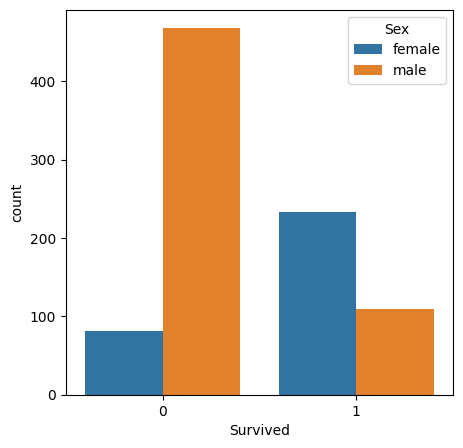

In [31]:
plt.figure(figsize=(5,5))
sns.countplot(x='Survived', data=df, hue='Sex')
plt.show()

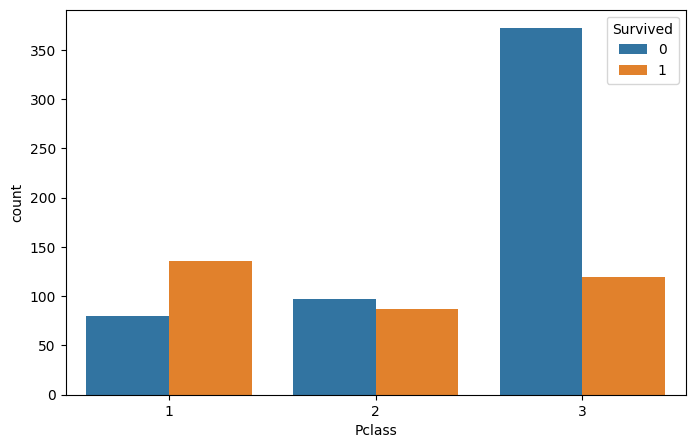

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(x='Pclass', data=df, hue='Survived')
plt.show()